## Duży lotek is a lottery game where a player selects six numbers. During the lotter 49 numbers are drawn. The prize depends on the number of matches (there must be three at least).The code in this notebook aims at checking if there is any system that enhances chance of winning a prize. 6400 lottery results are examinated. At the end of the notebook some statistical calculations and simulations are performed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data from a website

In [2]:
data=pd.read_csv('http://www.mbnet.com.pl/dl.txt',header=None)

In [3]:
data.head()

,0,1,2,3,4,5
0,1. 27.01.1957 8,12,31,39,43,45
1,2. 03.02.1957 5,10,11,22,25,27
2,3. 10.02.1957 18,19,20,26,45,49
3,4. 17.02.1957 2,11,14,37,40,45
4,5. 24.02.1957 8,10,15,35,39,49


### Changing the table to the form: index - date, six columns for each number

In [4]:
#extracting the first number
first_number=data[0].str.extract('(\d+$)').astype(int)
#extracting the date
data['date']=data[0].str.extract('(\d+\.\d+\.\d+)')

In [5]:
data[0]=first_number

In [6]:
#changing string type to datetime format
data['date']=pd.to_datetime(data['date'],format='%d.%m.%Y')

In [7]:
data.index=data['date']
del data['date']

In [8]:
#renaming the columns name
data.rename(columns={0:1,1:2,2:3,3:4,4:5,5:6},inplace=True)

In [9]:
data.head()

,1,2,3,4,5,6
date,,,,,,
1957-01-27,8,12,31,39,43,45
1957-02-03,5,10,11,22,25,27
1957-02-10,18,19,20,26,45,49
1957-02-17,2,11,14,37,40,45
1957-02-24,8,10,15,35,39,49


### Because the lotto game still takes place the results are limited to 6400 (to 14.04.2020)

In [30]:
data=data.iloc[:6400]
data.tail()

,1,2,3,4,5,6
date,,,,,,
2020-04-04,6,8,10,30,33,48
2020-04-07,15,21,26,33,38,43
2020-04-09,3,13,14,26,37,38
2020-04-11,14,19,27,37,41,45
2020-04-14,8,9,15,21,33,43


In [31]:
#a table with each number count
num_count=pd.concat([data[1].value_counts(),
                    data[2].value_counts(),
                    data[3].value_counts(),
                    data[4].value_counts(),
                    data[5].value_counts(),
                    data[6].value_counts()],axis=1,join='outer')


In [12]:
num_count.head()

,1,2,3,4,5,6
1,797.0,NaN,NaN,NaN,NaN,NaN
2,701.0,80.0,NaN,NaN,NaN,NaN
3,630.0,146.0,5.0,NaN,NaN,NaN
4,588.0,217.0,16.0,NaN,NaN,NaN
5,487.0,247.0,36.0,4.0,NaN,NaN


In [32]:
num_count.replace(np.nan,0,inplace=True)

### How to interpret _the num_count table_ ? number 1 was at the first place 796 times (it could not be at the second place because the numbers are sorted) number 5 was 487 times at the first place, 247 times at the second etc.

In [33]:
num_count=num_count.iloc[:,:].astype(int)
num_count.head()

,1,2,3,4,5,6
1,793,0,0,0,0,0
2,700,80,0,0,0,0
3,629,144,5,0,0,0
4,588,217,16,0,0,0
5,487,247,36,4,0,0


In [34]:
#now all the numbers are summed up
num_count_sum=num_count.sum(axis=1)
num_count_sum

1     793
2     780
3     778
4     821
5     774
6     829
7     764
8     764
9     787
10    765
11    779
12    722
13    808
14    783
15    807
16    759
17    836
18    800
19    777
20    791
21    831
22    793
23    758
24    824
25    811
26    780
27    831
28    797
29    799
30    757
31    803
32    785
33    761
34    849
35    769
36    804
37    784
38    816
39    752
40    784
41    766
42    802
43    712
44    742
45    803
46    787
47    729
48    705
49    749
dtype: int64

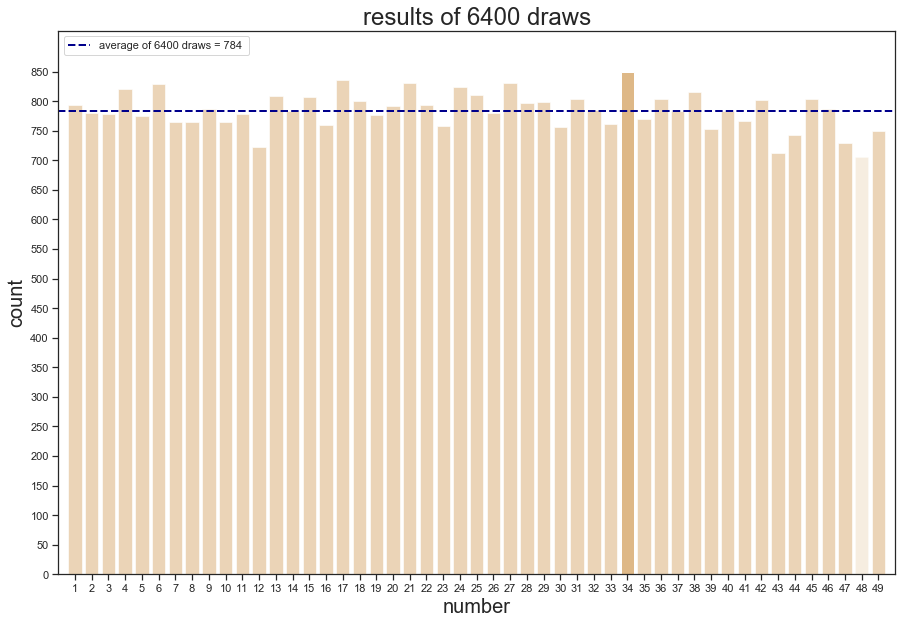

In [35]:
from scipy.special import binom
#visualizing the results
number=num_count_sum.index
count=num_count_sum.values

#this variable is explained in the section with statistics, it is theoretical chance of drawing an arbitrary number in one lottery
t_res=binom(48,5)/binom(49,6)

#in n=6400 draws the avarage number  for any given number equals t_res * n

#plotting
sns.set(style="ticks", color_codes=True)
fig, ax = plt.subplots(figsize=(15,10))
res=ax.bar(number,count,align='center',alpha=0.6,color='BurlyWood')
ax.axhline(round(t_res*data.shape[0],0),
                 color='DarkBlue', 
                 linewidth=2, 
                 linestyle='--', 
                 label='average of {} draws = {:.0f} '.format(data.shape[0],np.ceil(t_res*data.shape[0])))

ax.set(xlim=(0,50),
       ylim=(0,count.max()+70),
       xlabel='number',
       ylabel='count',
       xticks=np.arange(1,50),
       yticks=np.arange(0,900,50))
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.set_title('results of {} draws'.format(data.shape[0]), fontsize=24)
ax.legend(loc='upper left')

#setting colors for the max and min counts
for bar, height in zip(res, count):
    if height == count.max():
        bar.set(alpha=1)
    if height == count.min():
        bar.set(alpha=0.25)

plt.show()
# fig.savefig('lotto.png')

In [36]:
#top six numbers
top6=num_count_sum.nlargest(6).index
top6

Int64Index([34, 17, 21, 27, 6, 24], dtype='int64')

### Would it make sense to select top six numbers for every lottery?

In [18]:
#creating an array with the results
res_list=np.array([data[1],data[2],data[3],data[4],data[5],data[6]]).T

In [19]:
top6=np.array(top6)
matches=[]
for i in res_list:
    matches.append(6-np.unique(np.isin(top6,i),return_counts=True)[1][0])
m,n=np.unique(matches,return_counts=True)

for i,j in zip(m,n):
    print('sum of {} matches: {} '.format(i,j))

sum of 0 matches: 2618 
sum of 1 matches: 2731 
sum of 2 matches: 917 
sum of 3 matches: 135 
sum of 4 matches: 9 


### conclusion:
- 1. it is impossible to create a system of selecting numbers in order to increase chance of winning
- 2. There would be no point in selecting the six most offen drawn numbers. Ones would get 9 fours and 135 threes


## Statistics

### In this section the following probabilites are calculated:
- 1. Probability of drawing any given number in one lottery
- 2. The average number of draws for any given number in 6400 lotteries
- 3. The distribution for the number of draws in 6400 lotteries using the binominal distribution
- 4. A numerical experiment is performed to confirm the theoretical results
- 5. At the end the downloaded results are compared with the theoretical results

In [20]:
from scipy.stats import binom as bn
from scipy.special import binom

### The probability of drawing any given numbers is equal

$$ \frac{\binom{48}{5}}{\binom{49}{6}} \approx 0.122 $$

Six numbers are drawn, if one is assumed to be in the draw five numbers are left, therefore five draws from 48 numbers is divided by all possibilities

In [37]:
p=binom(48,5)/binom(49,6)
print('The chance that any given number will be drawn is {:.3f}'.format(p))
print('For {} draws the avarage number is {}'.format(data.shape[0],int(round(t_res*data.shape[0],0))))

The chance that any given number will be drawn is 0.122
For 6400 draws the avarage number is 784


In the following cell an experiment is performed to confirm the theoretical calculations. The draw is repeated _n=100 000_ times and during each draw six numbers from 49 are selected.

In [38]:
#a little simulation to prove theoretical calculations
num=np.arange(1,50)
#checking the results for 10
counter=0

#number of draws
number_of_drawing=100000
for i in range(number_of_drawing):
    #drawing 6 numbers out of 49
    results_t=np.random.choice(num,6,replace=False)
    if 10 in results_t: counter += 1

print('number 10 was drawn {} times in {} simulations '.format(counter,number_of_drawing))
print('it is {:.4f} of all draws'.format(counter/number_of_drawing))

number 10 was drawn 12306 times in 100000 simulations 
it is 0.1231 of all draws


The distribution for the number of draws for any number is given by the formula

$$ \binom{n}{k} p^k q^{(n-k)} $$ 
where
- _p_ - probability of drawing a number = 0.122
- _q=1-p_
- _n=6400_ - number of draws
- _k_ - number of success, i.e. _k_ is the number of draws in all lotteries

the mean value for 6400 draws is equal 784


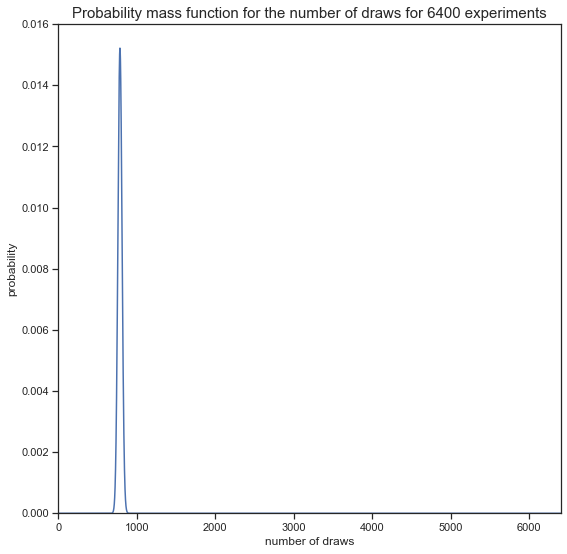

In [39]:
n=data.shape[0]
mean_value=round(n*p)
print('the mean value for {} draws is equal {:.0f}'.format(n,mean_value))

#probability mass function
prob_mass_fun=bn.pmf(k=np.arange(1,n+1),n=n,p=p)

plt.figure(figsize=(9,9))
plt.plot(np.arange(1,n+1),prob_mass_fun)
plt.xlim([0,6400])
plt.ylim([0,0.016])
plt.title('Probability mass function for the number of draws for {} experiments'.format(n), fontsize=15)
plt.xlabel('number of draws')
plt.ylabel('probability')
plt.show()


In the following cell a numerical experiment is performed to confirm the calculated distribution mentioned above. Note: this may take a long time (_64 000 000_ loops), it's better to load the experiment_results.txt file

In [24]:
num=np.arange(1,50)

#number of cycles
number_of_exp=10000

#number of draws in one cucle
number_of_drawing=data.shape[0]

# #list for results
# counter_list=[]
# for i in range(number_of_exp):
#     counter=0 
#     for j in range(number_of_drawing):
#         #drawing 6 numbers out of 49
#         results_t=np.random.choice(num,6,replace=False)
#         if 10 in results_t: counter += 1
#     counter_list.append(counter)

In [25]:
# np.savetxt("experiment.txt",np.array(counter_list),fmt='%d')
counter_list=np.loadtxt('experiment.txt')

The standard deviation is equal
$$ \sigma = \sqrt{np(1-p)} = 26.2 $$

The number that was drawn least times is 48. It was drawn 705 times 
Standard deviation for the number of draws is equal 26.2
The three-sigma region contains number of draws form 705 to 863
It means that 99.7% of all numbers of draws should be within this region
Probability that a number is drawn less than 706 times in 6400 draws is equal 0.13 %


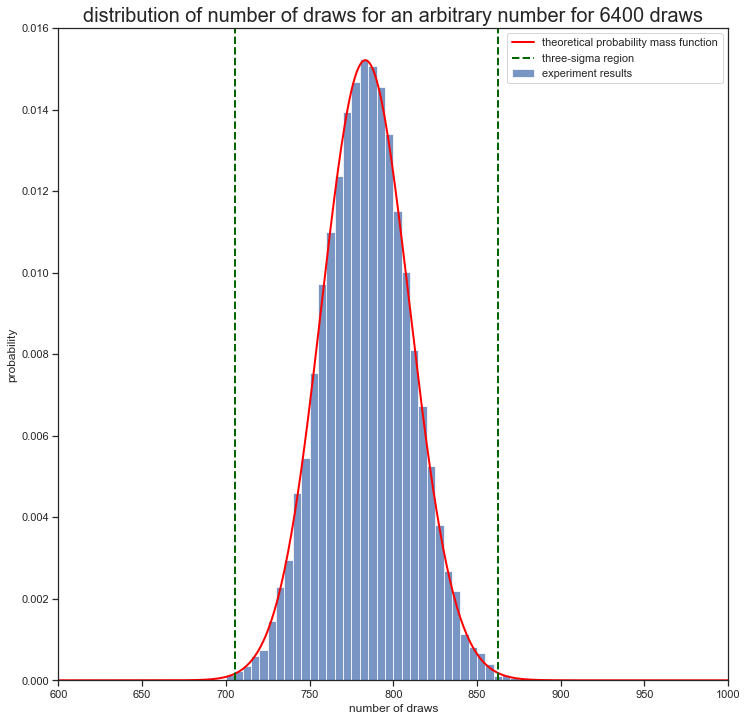

In [44]:
print('The number that was drawn least times is {}. It was drawn {} times '.format(num_count_sum.idxmin(),num_count_sum.min()))
std=np.sqrt(n*p*(1-p))
print('Standard deviation for the number of draws is equal {:.1f}'.format(std))
print('The three-sigma region contains number of draws form {:.0f} to {:.0f}'.format(round(mean_value-3*std),round(mean_value+3*std)))
print('It means that 99.7% of all numbers of draws should be within this region')

CI_low=mean_value-3*std
CI_high=mean_value+3*std

print('Probability that a number is drawn less than 706 times in {} draws is equal {:.2f} %'.format(n,100*bn.cdf(num_count_sum.min(),n,p)))

plt.figure(figsize=(12,12))
plt.plot(np.arange(1,n+1),prob_mass_fun,label='theoretical probability mass function',lw=2,color='red')
plt.axvline(CI_low,lw=2,ls='--',color='darkgreen',label='three-sigma region')
plt.axvline(CI_high,lw=2,ls='--',color='darkgreen')
plt.xlim([600,1000])

plt.hist(counter_list,bins=np.arange(650,950,5),density=True, label='experiment results',alpha=0.75)
plt.legend()
plt.xlabel('number of draws')
plt.ylabel('probability')
plt.title('distribution of number of draws for an arbitrary number for {:.0f} draws'.format(data.shape[0]),fontsize=20)
plt.show()

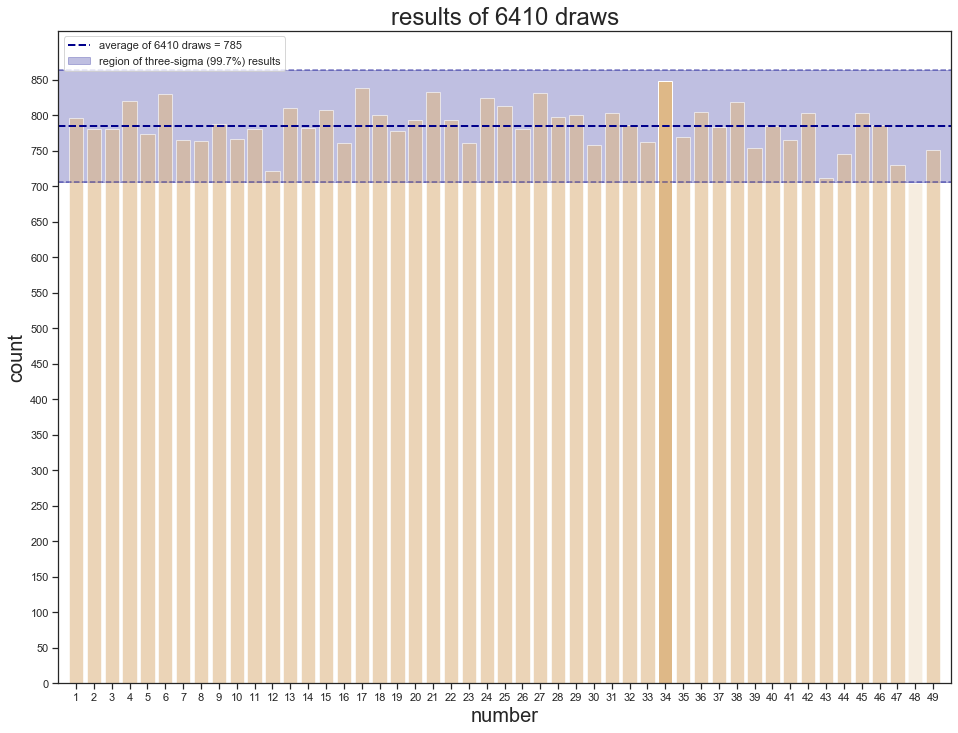

In [27]:
#plotting
sns.set(style="ticks", color_codes=True)
fig, ax = plt.subplots(figsize=(16,12))
res=ax.bar(number,count,align='center',alpha=0.6,color='BurlyWood')
ax.axhline(round(t_res*data.shape[0],0),
                 color='DarkBlue', 
                 linewidth=2, 
                 linestyle='--', 
                 label='average of {} draws = {:.0f} '.format(data.shape[0],np.ceil(t_res*data.shape[0])))

ax.axhline(CI_low,color='DarkBlue',lw=1.5,ls='--',alpha=0.5)
ax.axhline(CI_high,color='DarkBlue',lw=1.5,ls='--',alpha=0.5)

plt.fill_between(np.arange(51),CI_low,CI_high, where=(CI_low<CI_high),
                 interpolate=True, color='darkblue', alpha=0.25,
                 label='region of three-sigma (99.7%) results')


ax.set(xlim=(0,50),
       ylim=(0,count.max()+70),
       xlabel='number',
       ylabel='count',
       xticks=np.arange(1,50),
       yticks=np.arange(0,900,50))
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.set_title('results of {} draws'.format(data.shape[0]), fontsize=24)
ax.legend(loc='upper left')

#setting colors for the max and min counts
for bar, height in zip(res, count):
    if height == count.max():
        bar.set(alpha=1)
    if height == count.min():
        bar.set(alpha=0.25)

plt.show()
